# Importing all libraries here

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as se
from sklearn.model_selection import train_test_split
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
print(__doc__)


from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

data = pd.read_csv('training.csv')
data = data.drop('Unnamed: 0', axis=1)

data = data.fillna(data.mean())

# Separating train and test samples by 30 for the testing 
X = data [['RevolvingUtilizationOfUnsecuredLines', 'age',
          'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
          'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
          'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
          'NumberOfDependents']]
y = data [['SeriousDlqin2yrs']]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=49)

Automatically created module for IPython interactive environment


In [5]:
# Fit to data and predict using pipelined GNB and PCA.
GNB_normal = make_pipeline( GaussianNB())
GNB_normal.fit(X_train, y_train)
pred_test_normal = GNB_normal.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
clf_GNB_scaled = make_pipeline(StandardScaler(), GaussianNB())
clf_GNB_scaled.fit(X_train, y_train)
pred_test_scaled = clf_GNB_scaled.predict(X_test)

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf_GNB = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf_GNB.fit(X_train, y_train)
pred_test = unscaled_clf_GNB.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf_GNB = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf_GNB.fit(X_train, y_train)
pred_test_std = std_clf_GNB.predict(X_test)

logreg_model = LogisticRegression().fit(X_train,y_train)
logreg_prediction = logreg_model.predict(X_test)



rf_model = RandomForestClassifier(random_state=1234).fit(X_train, y_train)
rf_prediction = rf_model.predict(X_test)

#Linear

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset (GNB model)')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_normal)))

print('\nPrediction accuracy for the standardized test dataset (GNB model)')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_scaled)))

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA (GNB model)')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA (GNB model)')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

# Show prediction accuracies
print('\nPrediction accuracy for the Logistic Regression model')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, logreg_prediction)))

print('\nPrediction accuracy for the Random Forest Model')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, rf_prediction)))


Prediction accuracy for the normal test dataset (GNB model)
93.24%


Prediction accuracy for the standardized test dataset (GNB model)
93.18%


Prediction accuracy for the normal test dataset with PCA (GNB model)
93.32%


Prediction accuracy for the standardized test dataset with PCA (GNB model)
93.24%


Prediction accuracy for the Logistic Regression model
93.44%


Prediction accuracy for the Random Forest Model
93.23%



## This method for plotting the learning curve for the models

In [6]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Learning Curve for GNB, Logistic Regression, and Random Forest

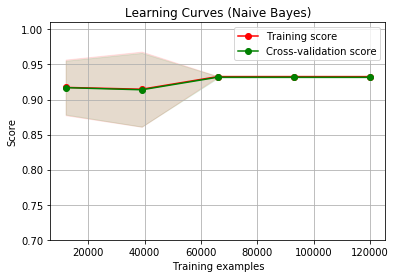

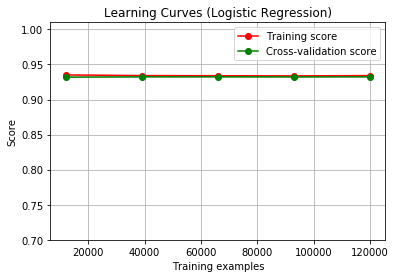

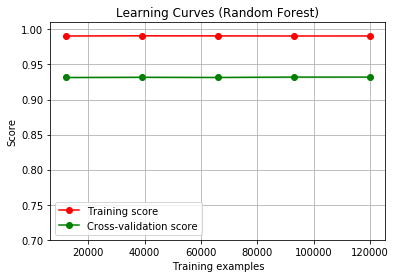

In [7]:
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=49)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (Logistic Regression)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (Random Forest)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

# Calibration Curve for GNB, Logistic Regression, and Random Forest

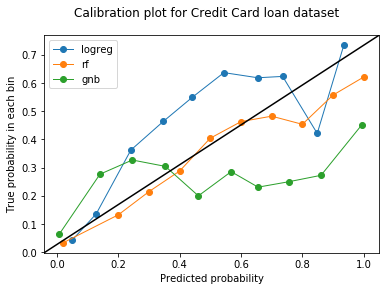

In [8]:
from sklearn.calibration import calibration_curve
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

logreg_model = LogisticRegression().fit(X_train,y_train)
logreg_prediction = logreg_model.predict_proba(X_test)


rf_model = RandomForestClassifier(random_state=1234).fit(X_train, y_train)
rf_prediction = rf_model.predict_proba(X_test)

GNB_normal = make_pipeline( GaussianNB())
GNB_normal.fit(X_train, y_train)
GNB_prediction = GNB_normal.predict_proba(X_test)


logreg_y, logreg_x = calibration_curve(y_test, logreg_prediction[:,1], n_bins=10)

rf_y, rf_x = calibration_curve(y_test, rf_prediction[:,1], n_bins=10)

gnb_y, gnb_x = calibration_curve(y_test, GNB_prediction[:,1], n_bins=10)


# calibration curves
fig, ax = plt.subplots()
plt.plot(logreg_x,logreg_y, marker='o', linewidth=1, label='logreg')
plt.plot(rf_x, rf_y, marker='o', linewidth=1, label='rf')
plt.plot(gnb_x, gnb_y, marker='o', linewidth=1, label='gnb')


# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot for Credit Card loan dataset')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()